In [5]:
import tensorflow as tf
import numpy as np

In [2]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


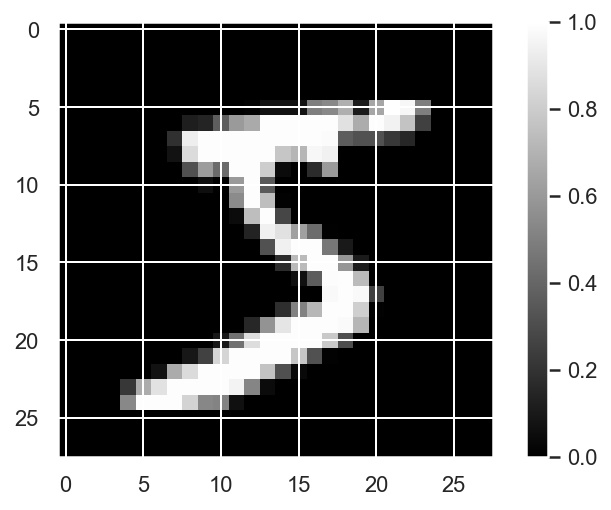

5


In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [10]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0836
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0196
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0128
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0102
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0089
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0080
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0074
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0070
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0067
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0064


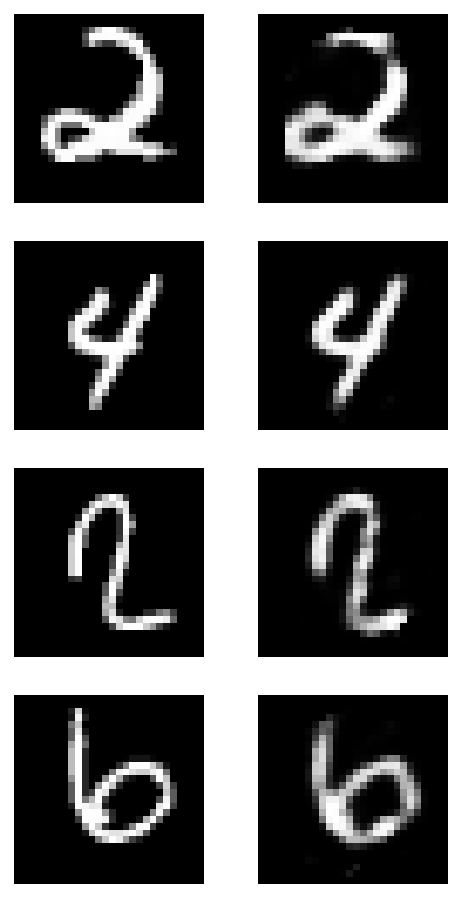

313/313 [==============================] - 1s 1ms/step - loss: 0.0060


0.006016245111823082

In [12]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

In [16]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_13 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

In [17]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 8s 34ms/step - loss: 0.1118
Epoch 2/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0340
Epoch 3/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0230
Epoch 4/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0193
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0177
Epoch 6/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0169
Epoch 7/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0164
Epoch 8/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0159
Epoch 9/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0156
Epoch 10/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0155
Epoch 11/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0152
Epoch 12/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0152
Epoch 13/20
2

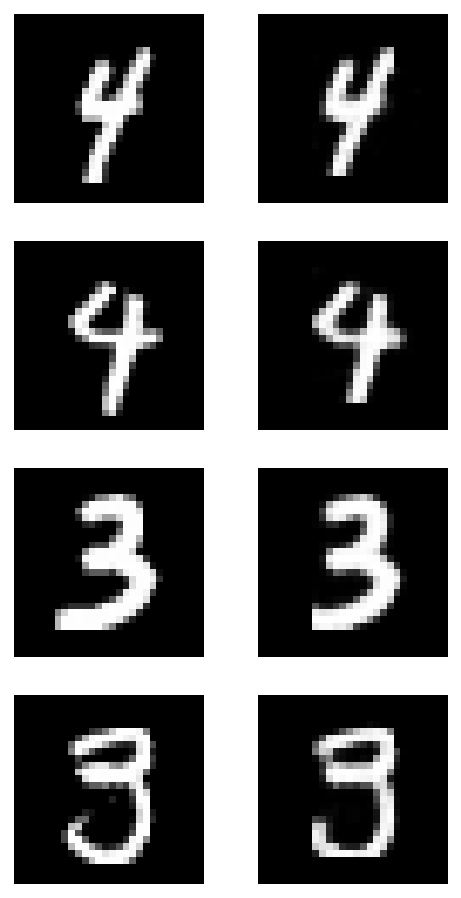

313/313 [==============================] - 1s 2ms/step - loss: 0.0140


0.013967796228826046

In [18]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### RELU 말고 ELU

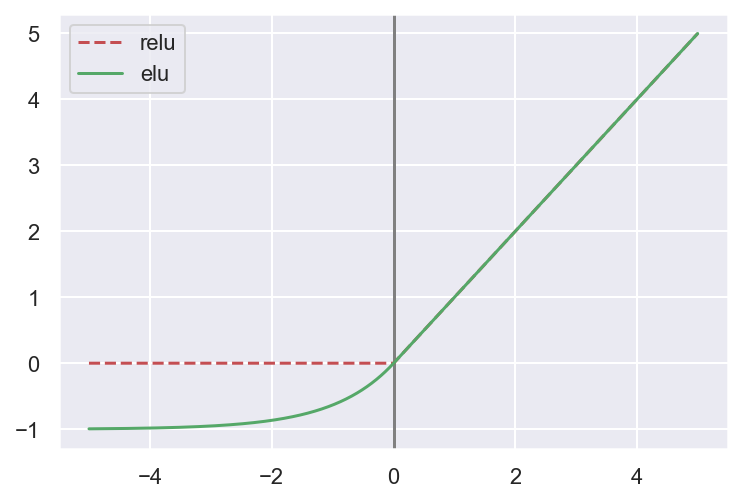

In [3]:
import math
x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) -1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [20]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 9s 35ms/step - loss: 0.1015
Epoch 2/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0286
Epoch 3/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0192
Epoch 4/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0161
Epoch 5/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0144
Epoch 6/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0134
Epoch 7/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0128
Epoch 8/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0124
Epoch 9/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0122
Epoch 10/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0119
Epoch 11/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0117: 0s - loss: 0.
Epoch 12/20
235/235 [==============================] - 8s 34ms/step - loss: 0.011

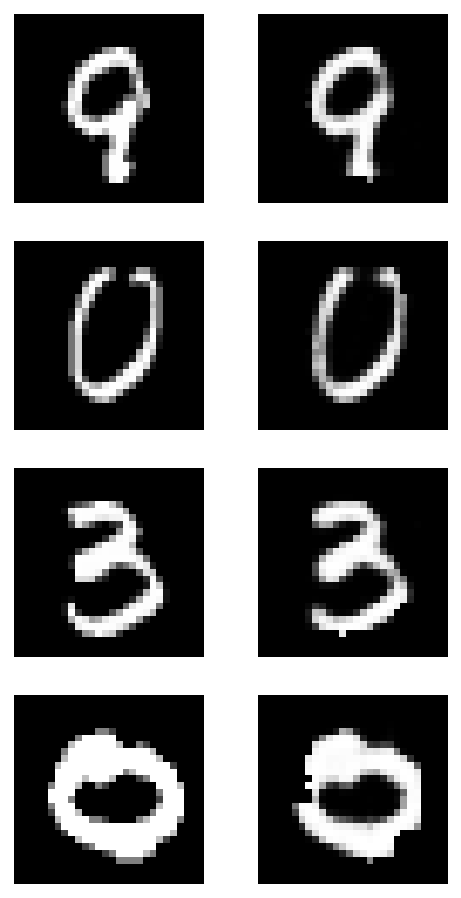

313/313 [==============================] - 1s 2ms/step - loss: 0.0098


0.009816423989832401

In [21]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)